### Model: [amd/DeepSeek-R1-MXFP4](https://huggingface.co/amd/DeepSeek-R1-MXFP4)
### Both vLLM versions were evaluated on the same MI350x8 node, one at a time.
- vllm-dev-dsfp4_1120 - [docker.io/rocm/vllm-dev:dsfp4_1120](https://hub.docker.com/layers/rocm/vllm-dev/dsfp4_1120/images/sha256-deefdb324c7f04a96d852d6924788bf0d31e9a6ad91b508b2865051e48bcd2e1)
- vllm-latest-0.15.1 - [docker.io/vllm/vllm-openai-rocm:v0.15.1](https://hub.docker.com/layers/vllm/vllm-openai-rocm/v0.15.1/images/sha256-4c7fbd92fe07e4dab956d283b5d61b971f6242516647df6af06fdcbc34fddc2c)

### Each vLLM version was tested with 60 samples, using num_prompts values from 1 to 60, and all runs completed successfully.
### Both input and output lengths are 1024 for all test cases.

In [1]:
import json
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy
%matplotlib inline  

In [2]:
df = pd.read_csv("./deepseek_r1_mxfp4_vllm_20260216.csv")

In [3]:
#df.info()
#df.head()

In [4]:
df['others'].unique()

array(['doks-1.34.1-rocm-7.0.2-mi350x8-vllm-dev-dsfp4_1120',
       'doks-1.34.1-rocm-7.0.2-mi350x8-vllm-latest-0.15.1'], dtype=object)

In [5]:
# All requests are successfully processed
df [ df['failed'] >0 ] 

,others,total_input_tokens,total_token_throughput,backend,base_url,endpoint_type,max_concurrent_requests,std_itl_ms,timestamp,tokenizer_id,...,max_concurrency,duration,request_goodput,label,mean_tpot_ms,p99_ttft_ms,output_throughput,max_output_tokens_per_s,median_ttft_ms,model_id


In [6]:
# Split samples
df_dev    = df[ df["others"] == "doks-1.34.1-rocm-7.0.2-mi350x8-vllm-dev-dsfp4_1120" ].copy()
df_latest = df[ df["others"] == "doks-1.34.1-rocm-7.0.2-mi350x8-vllm-latest-0.15.1" ].copy()

df_dev = df_dev.sort_values("num_prompts")
df_latest = df_latest.sort_values("num_prompts")

print(df_dev.shape)
print(df_latest.shape)

(60, 37)
(60, 37)


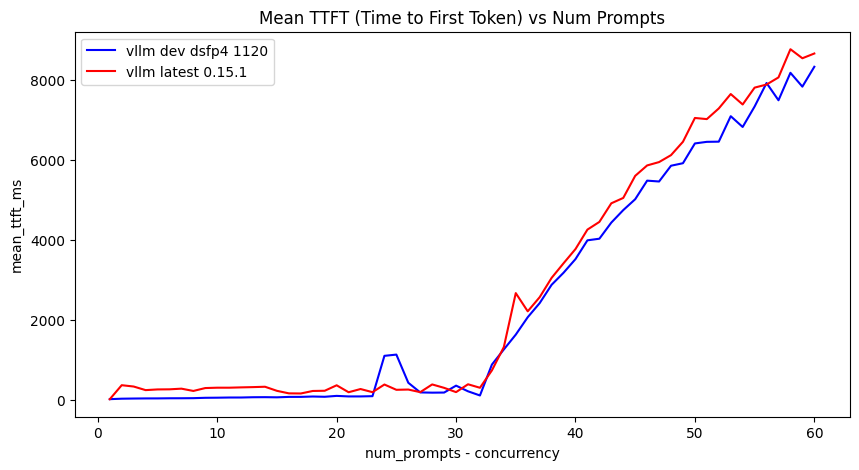

In [7]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["mean_ttft_ms"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["mean_ttft_ms"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("mean_ttft_ms")
plt.title("Mean TTFT (Time to First Token) vs Num Prompts")
plt.legend()

plt.show()

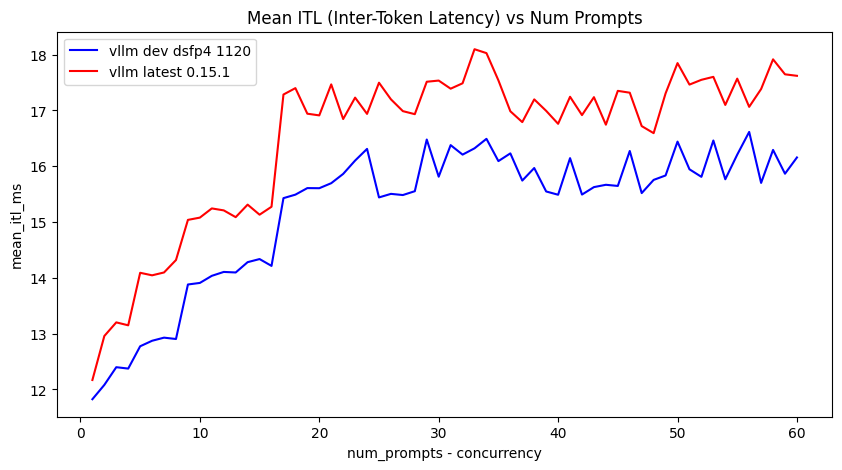

In [8]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["mean_itl_ms"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["mean_itl_ms"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("mean_itl_ms")
plt.title("Mean ITL (Inter-Token Latency) vs Num Prompts")
plt.legend()

plt.show()

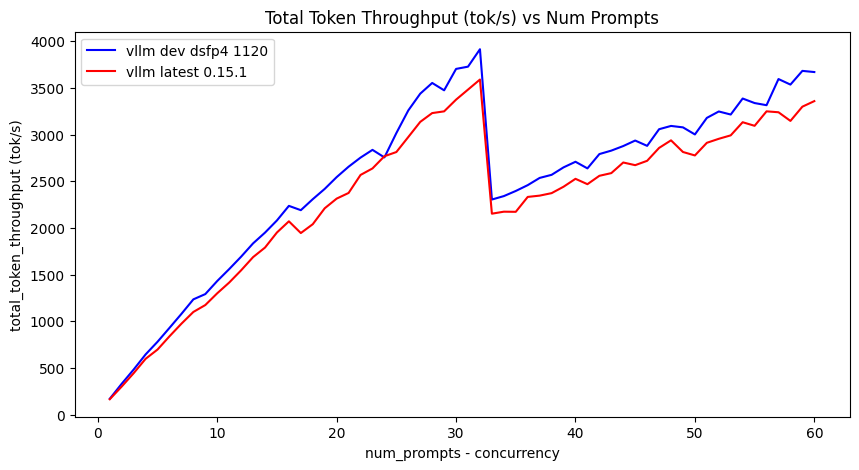

In [9]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["total_token_throughput"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["total_token_throughput"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Total Token Throughput (tok/s) vs Num Prompts")
plt.legend()

plt.show()

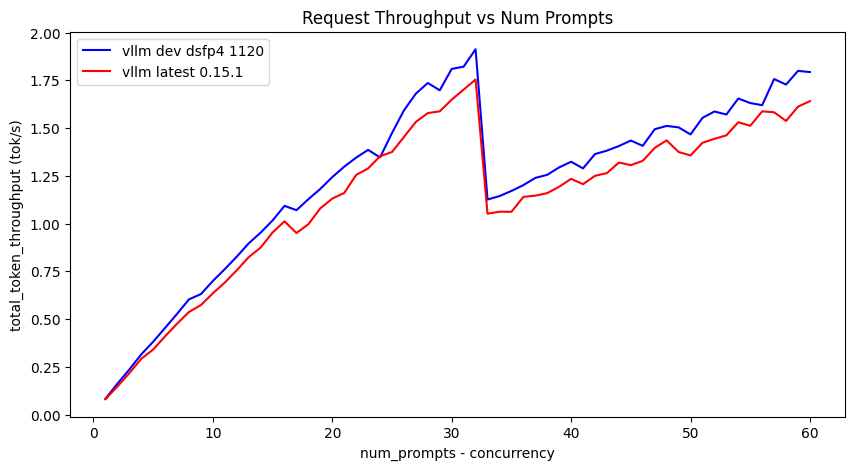

In [10]:
plt.figure(figsize=(10, 5)) 

plt.plot(
    df_dev["num_prompts"],
    df_dev["request_throughput"],
    color="blue",
    label="vllm dev dsfp4 1120"
)

plt.plot(
    df_latest["num_prompts"],
    df_latest["request_throughput"],
    color="red",
    label="vllm latest 0.15.1"
)

plt.xlabel("num_prompts - concurrency")
plt.ylabel("total_token_throughput (tok/s)")
plt.title("Request Throughput vs Num Prompts")
plt.legend()

plt.show()